In [10]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix

# umap
# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [11]:
customer_data = pd.read_csv( 'C:/Users/aprataso/Downloads/final_data/treated/customer_info_EDA.csv')
customer_data.head(2)

,marital_status_code,homeowner_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,gender(s),quantity,retail_disc,coupon_disc,coupon_match_disc,sales_value_eu,department,first_transaction_date,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,homeowner_code,total_quantity,total_sales_value
0,0,Homeowner,1,married,senior,2.000,0,65.000,42000,0.000,2,2.000,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",-0.404,-0.047,-0.015,"[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","['Groceries', 'Groceries', 'Groceries', 'DELI'...",2021-02-20,4158.560,226.990,418.070,127.380,712.800,67.590,21.400,4.470,8.550,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,1997,4634.320
1,0,Homeowner,7,married,middle-aged,2.000,0,49.500,62000,0.000,2,2.000,"[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...",-0.375,-0.024,-0.004,"[3.62, 1.17, 2.82, 4.28, 4.18, 4.13, 1.46, 2.4...","['Groceries', 'Groceries', 'Groceries', 'Groce...",2021-01-23,2957.050,171.570,314.790,27.620,845.930,0.000,0.000,0.000,5.340,101.340,1.870,7.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,1554,3638.350


In [12]:
#customer_data = customer_data.drop(['MISC SALES TRAN_spend', 'KIOSK-GAS_spend'], axis = 1)

In [13]:
# creating a new variable with only numeric data
info_numeric = customer_data.loc[:, ~customer_data.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group', 'quantity', 'sales_value_eu', 'department', 'first_transaction_date'])]

In [27]:
scaled_info = StandardScaler().fit_transform(info_numeric)

## K-Means

In [28]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

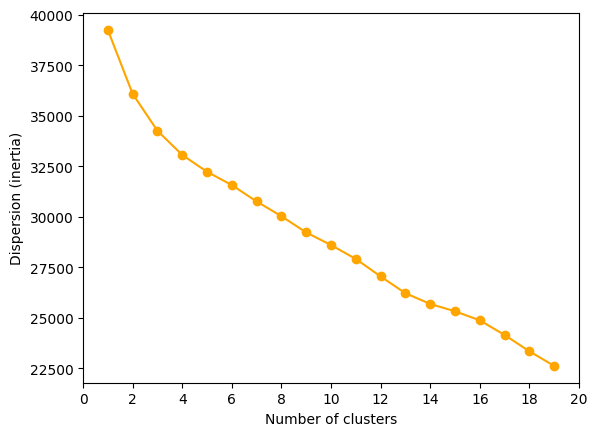

In [29]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [30]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_info)

info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\3850735758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_kmeans'] = kmeans.predict(scaled_info)


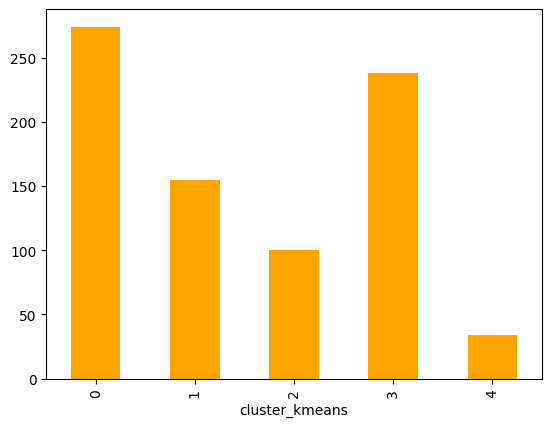

In [31]:
info_numeric.groupby(['cluster_kmeans']).size().plot(kind='bar', color='orange')
plt.show()

In [33]:
pd.set_option('display.float_format', '{:.3f}'.format)

info_numeric.groupby(['cluster_kmeans']).mean().T


## NO SCALLING
# 0 - spend little 
# 1 - people w/ kids, buy a lot with retail_disc, buy more items, homewoners
# 2 - 
# 3 - high income, like groceries and bakery stuff
# 4 - rent videos, seafood lovers

## SCALLING
# 0 - single
# 1 - 2 adults + 2 kids
# 2 - 2 adults with 0-1 kids
# 3 - adults w/o kids
# 4 - discount lovers

cluster_kmeans,0,1,2,3,4
marital_status_code,1.839,0.535,0.940,0.723,0.941
household_key,1217.949,1210.419,1334.240,1211.059,1364.324
adult_category_size,1.004,2.000,1.700,1.874,1.559
has_kids,0.000,0.987,0.280,0.000,0.206
avg_age,43.391,40.384,43.970,47.107,45.015
avg_income,49895.985,70900.000,94230.000,65567.227,65411.765
n_kids,0.000,1.832,0.510,0.000,0.324
n_household,1.274,3.832,2.400,2.122,2.118
gender(s),0.580,2.000,1.590,1.866,1.471
retail_disc,-0.509,-0.568,-0.523,-0.537,-0.868


In [34]:
def visualize_dimensionality_reduction(transformation, targets):
    """
       Visualizes the dimensionality reduction results using a scatter plot.
  
       Args:
           transformation (np.ndarray): The transformed data points.
           targets (List[Any]): The target labels or categories for each data point.
  
       Returns:
           None
       """
    # create a scatter plot of the UMap output
    plt.scatter(transformation[:, 0], transformation[:, 1], 
              color=plt.cm.tab10(np.array(targets).astype(int)))

    labels = np.unique(targets)

    # create a legend with the class labels and colors
    handles = [plt.scatter([],[], color=plt.cm.tab10(i), label=label) for i, label in enumerate(labels)]
    plt.legend(handles=handles, title='Clusters')

    plt.show()

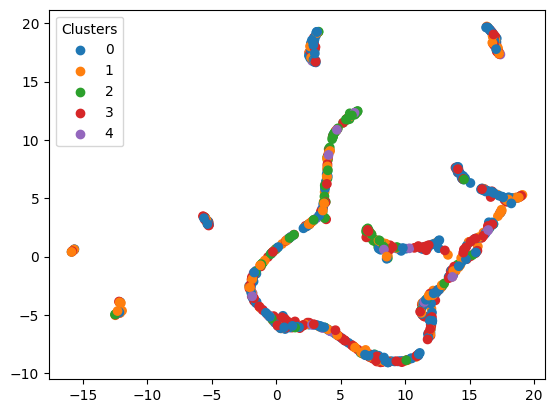

In [35]:
#run umap first

visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_kmeans'].sort_index())

## Hierarchical

In [36]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_info)

In [37]:
def plot_dendrogram(model, **kwargs):
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments: 
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

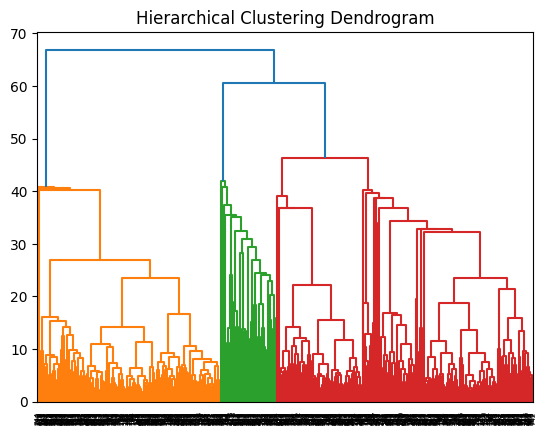

In [38]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

In [39]:
info_numeric['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\2294577397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_ward'] = AgglomerativeClustering(


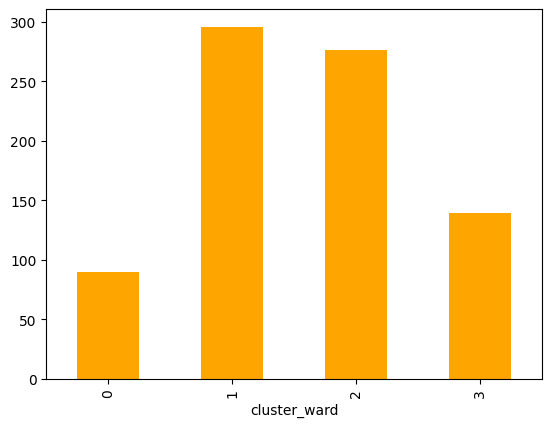

In [40]:
info_numeric.groupby(['cluster_ward']).size().plot(kind='bar', color='orange')
plt.show()

In [41]:
info_numeric.groupby(['cluster_ward']).mean().T

cluster_ward,0,1,2,3
marital_status_code,0.767,1.635,0.953,0.496
household_key,1405.000,1211.297,1217.667,1210.835
adult_category_size,1.733,1.010,1.888,2.000
has_kids,0.356,0.000,0.072,0.978
avg_age,44.517,43.939,45.913,40.309
avg_income,103516.667,51778.716,65936.594,65262.590
n_kids,0.656,0.000,0.123,1.820
n_household,2.556,1.422,2.094,3.820
gender(s),1.667,0.608,1.862,2.000
retail_disc,-0.560,-0.508,-0.572,-0.566


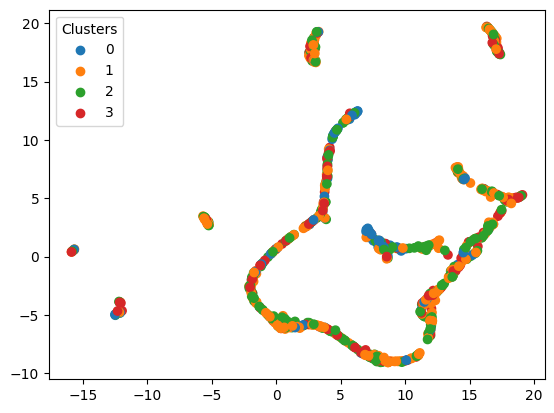

In [42]:
#run umap first

visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_ward'].sort_index())

## DB Scan

In [45]:
info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\2362419876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)


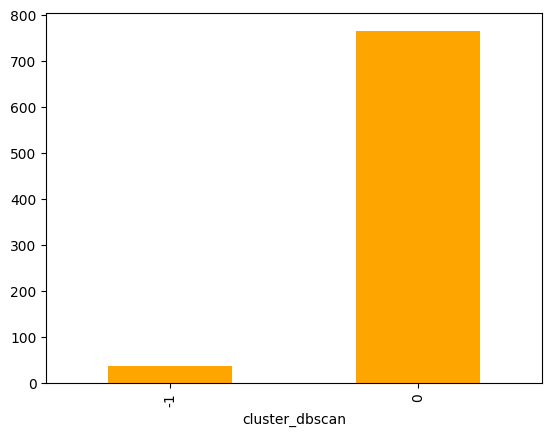

In [46]:
info_numeric.groupby(['cluster_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [47]:
info_numeric.groupby(['cluster_dbscan']).mean().T

cluster_dbscan,-1,0
marital_status_code,1.056,1.107
household_key,1455.639,1224.801
adult_category_size,1.639,1.562
has_kids,0.333,0.230
avg_age,41.056,44.195
avg_income,75388.889,64312.418
n_kids,0.639,0.422
n_household,2.278,2.193
gender(s),1.528,1.395
retail_disc,-0.553,-0.545


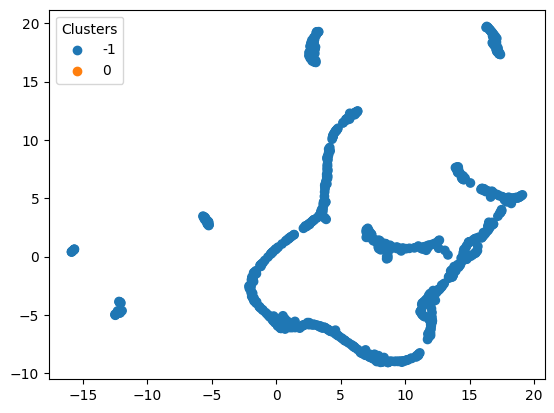

In [48]:
#run umap first

visualize_dimensionality_reduction(umap_embedding, info_numeric['cluster_dbscan'].sort_index())

## UMAP

In [21]:
umap_object = umap.UMAP(n_neighbors=15, min_dist=0.3, random_state=42)

In [22]:
X_sample = info_numeric.sort_index()

In [23]:
umap_embedding = umap_object.fit_transform(X_sample)

C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## UMAP to DB SCAN

In [49]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X_sample)


C:\Users\aprataso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


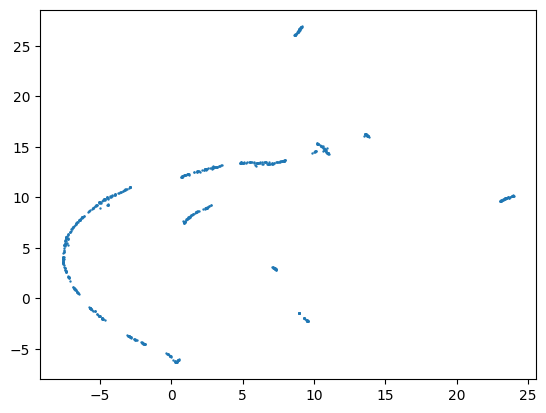

In [50]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],s=0.5)

In [51]:
labels = DBSCAN(eps=1, min_samples=20).fit_predict(clusterable_embedding)

In [52]:
info_numeric['cluster_umap_dbscan'] = labels

C:\Users\aprataso\AppData\Local\Temp\ipykernel_17244\242391019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_umap_dbscan'] = labels


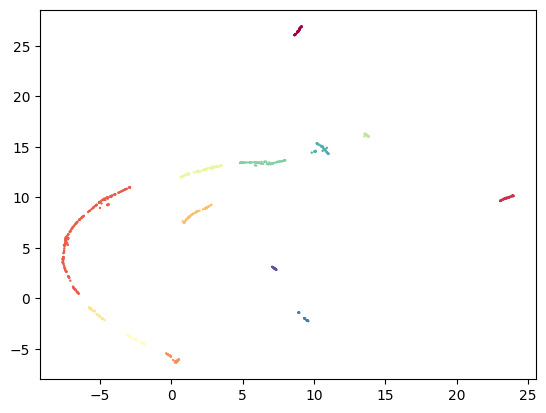

In [53]:
clustered = (labels >= 0) 
# Plotting points not belonging to any cluster in gray (outliers)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.3,
            alpha=0.5)

# Plotting points belonging to each cluster
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='Spectral');

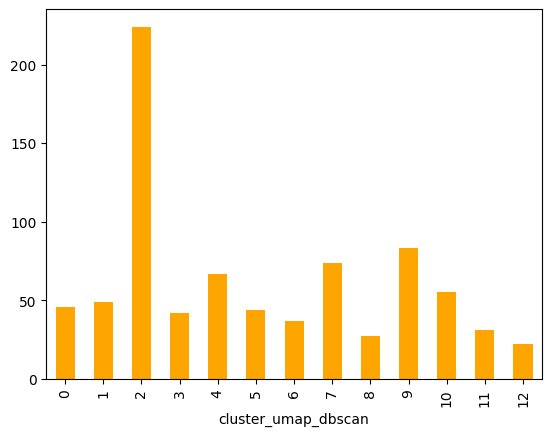

In [54]:
info_numeric.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [55]:
info_numeric.groupby(['cluster_umap_dbscan']).mean().T

# -1 -> very high income, high spend on garden (more money -> big houses w/ gardens), high spend on seafood (expensive)
# 0 ->
# 1 -> high spend on spirits
# 2
# 3 -> only ones that spent money renting videos
# 4 -> spend a good part of their money on groceries
# 5 -> with high number of kids
# 6
# 7 -> wealthy but not as much as -1, big household size
# 8 -> spend more in Dairy deli, like to eat in restaurants

# -1, 7, 8 -> high incomes, high spends on cosmetics, flower, seafood

cluster_umap_dbscan,0,1,2,3,4,5,6,7,8,9,10,11,12
marital_status_code,1.109,1.306,1.174,0.810,1.090,0.932,1.000,1.068,1.481,1.108,1.236,0.742,0.909
household_key,1031.413,1185.061,1227.844,1224.310,1339.836,1346.636,1409.270,1319.324,1215.852,1187.783,1092.909,1305.806,1209.409
adult_category_size,1.587,1.469,1.545,1.810,1.612,1.614,1.514,1.541,1.296,1.614,1.455,1.710,1.636
has_kids,0.217,0.184,0.214,0.405,0.194,0.250,0.270,0.216,0.037,0.241,0.255,0.419,0.273
avg_age,43.804,44.245,43.761,42.357,43.604,42.977,44.959,43.311,44.370,45.145,45.127,46.581,44.136
avg_income,42000.000,62000.000,58234.375,75845.238,84970.149,89761.364,78027.027,62831.081,29500.000,60765.060,18290.909,154000.000,87000.000
n_kids,0.435,0.327,0.384,0.833,0.358,0.477,0.459,0.405,0.037,0.446,0.418,0.806,0.500
n_household,2.304,1.857,2.107,2.643,2.104,2.318,2.378,2.162,1.852,2.277,2.145,2.581,2.364
gender(s),1.413,1.265,1.379,1.738,1.463,1.455,1.324,1.270,1.111,1.542,1.291,1.581,1.364
retail_disc,-0.526,-0.494,-0.590,-0.589,-0.547,-0.532,-0.531,-0.543,-0.530,-0.542,-0.497,-0.463,-0.488
